<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

# Survival Analysis

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## Why Survival Analysis Matters in Personalized Medicine

In personalized medicine, one of the most critical questions is not just **who has a disease**, but **how the disease will progress for different individuals**. This is where **survival analysis** becomes essential.

### What is Survival Analysis?

**Survival analysis** is a set of statistical methods used to analyze the time until an event of interest occurs—most commonly, time to death, disease progression, or relapse. Unlike standard classification or regression methods, survival analysis accounts for:

- **Censoring**: When we don't observe the event for all individuals during the study period.
- **Time-to-event**: The actual duration matters, not just whether the event occurred.

### Why Is This Important in Personalized Medicine?

In the context of **precision or personalized medicine**, we aim to tailor treatment strategies based on an individual's predicted disease trajectory. Survival analysis helps us:

- **Stratify patients** into risk groups with different prognoses.
- **Quantify** how different subtypes or treatments influence patient outcomes over time.
- **Guide decision-making** for clinicians by providing evidence on expected survival outcomes.

---

## Kaplan-Meier Curves and Subtype Stratification

In our previous task, we used a **random forest classifier** to identify a panel of biomarkers that can distinguish between **DESNT** and **non-DESNT** prostate cancer subtypes.

We will now use **Kaplan-Meier survival curves** to compare survival outcomes between these groups.

### Why Kaplan-Meier?

Kaplan-Meier curves offer a simple, visual way to:

- Estimate survival probabilities over time.
- Compare different patient subgroups (e.g., DESNT vs non-DESNT).
- Assess whether certain molecular subtypes are associated with **better or worse prognosis**.

By integrating machine learning classification with survival analysis, we can **move beyond static diagnostic labels** and start predicting **dynamic clinical outcomes**—a foundational goal of data-driven personalized medicine.


## 1) First, we need to import the libraries that we are going to use  
  
We are going to use the `lifelines` library in Python to do survival analysis. More on this later.

In [1]:
src_dir = "../../../src"
import sys
sys.path.append(src_dir)

from install_if_missing import install_if_missing

install_if_missing("lifelines", verbose=True)

'lifelines' is already installed.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use("ggplot")

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## Lifelines Library
  
`lifelines` is a library written in `Python` that is designed for survival analysis. It can do a wide range of things, including plotting survival curves and hazard modelling. We are only going to cover Kaplan-Meier survival curves in this course.  
  
The documentation for `lifelines` can be found here: https://lifelines.readthedocs.io/en/latest/index.html.  
It is always good practice, when using a new library that you are not familiar with, to check the documentation. 

### Kaplan-Meier Fitting
  
To fit a Kaplan-Meier curve using `lifelines`, we use the following code: 

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

``` {python}
# import KaplanMeierFitter function from the lifelines library
from lifelines import KaplanMeierFitter

# create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# fit the object with our data
kmf.fit(durations = df["Duration"], 
        event_observed = df["Event_Indication"])
```  

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Our dataset must have at least two columns in it. The first of these columns must be numbers and will be the time that each patient was observed until. The second of these column will always be 0 or 1, and represents whether or not the event happened.  
  
In the cell below, I load in the DESNT survival data, which has the DESNT-status for each patient, as well as columns relating to disease-free status. You can see that we have two columns, called `"DFS_STATUS"` and `"DFS_MONTHS"`.
  
`"DFS_STATUS"` is the indicator column; if it is equal to 0, the patient was still disease-free when follow-up stopped.  
If it is equal to 1, the prostate cancer recurred or progressed in the patient.
  
`"DFS_MONTHS"` is the time (in months) until censorship of the patient. `DFS_MONTHS` will be the `durations` column for `lifelines` and `DFS_STATUS` will be the `event_observed` column for lifelines

In [3]:
desnt_survival = pd.read_csv("dataset/desnt_survival.csv")

In [4]:
desnt_survival.head(20)

,DESNT_Status,DFS_STATUS,DFS_MONTHS,SAMPLE_ID
0,Negative,0,20.40,TCGA-2A-A8VL-01
1,Positive,0,55.88,TCGA-2A-A8VO-01
2,Negative,0,45.11,TCGA-2A-A8VT-01
3,Positive,0,22.04,TCGA-2A-A8VV-01
4,Positive,0,45.27,TCGA-2A-A8VX-01
5,Positive,0,3.68,TCGA-2A-A8W1-01
6,Positive,1,6.50,TCGA-2A-A8W3-01
7,Positive,0,44.81,TCGA-2A-AAYF-01
8,Negative,0,41.79,TCGA-2A-AAYO-01
9,Positive,0,20.20,TCGA-2A-AAYU-01


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## 1) Kaplan-Meier Curves for the DESNT Subtypes

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Now, we can use lifelines to plot the survival functions for the two different cases that we are interested in. We want to compare whether the survival curves differ for patients who have DESNT-positive and DESNT-negative status.  
  
First, we identify the two subsets of patients. We use `pandas` to do this.

In [5]:
# first, we identify the patients who were DESNT-negative and the patients who were DESNT-positive
desnt_negative = desnt_survival[desnt_survival["DESNT_Status"] == "Negative"] # finds the patients in desnt_survival who have DESNT_STATUS = "Negative"
desnt_positive = desnt_survival[desnt_survival["DESNT_Status"] == "Positive"] # finds the patients in desnt_survival who have DESNT_STATUS = "Positive"

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Next, we fit KaplanMeierFitter objects for each of our groups (DESNT-Negative and DESNT-Positive)

In [6]:
# importing the modules we need to import

src_dir = "../../../src"
import sys
sys.path.append(src_dir)

from install_if_missing import install_if_missing

install_if_missing("lifelines", verbose=True)

'lifelines' is already installed.


In [7]:
from lifelines import KaplanMeierFitter # importing the KaplanMeierFitter function from the lifelines library

In [8]:
# making separate KaplanMeierFitter objects for the DESNT-negative and DESNT-positive groups
kmf_negative = KaplanMeierFitter()

kmf_negative.fit(durations = desnt_negative["DFS_MONTHS"],  # the DFS_MONTHS column is the "durations" data
                event_observed = desnt_negative["DFS_STATUS"]) # the DFS_STATUS column is the "event_observed data"


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 328 total observations, 280 right-censored observations>

In [9]:
kmf_positive = KaplanMeierFitter()

kmf_positive.fit(durations = desnt_positive["DFS_MONTHS"],  # the DFS_MONTHS column is the "durations" data
                event_observed = desnt_positive["DFS_STATUS"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 328 total observations, 238 right-censored observations>

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

Finally, we plot both of these Kaplan-Meier curves on the same figure

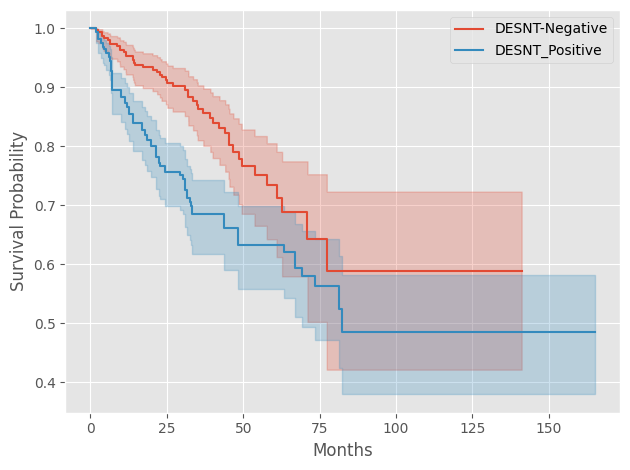

In [10]:
fig, ax = plt.subplots()
kmf_negative.plot_survival_function(ax = ax, label = "DESNT-Negative")
kmf_positive.plot_survival_function(ax = ax, label = "DESNT_Positive")
ax.set_xlabel(r"Months")
ax.set_ylabel(r"Survival Probability")
fig.tight_layout()
plt.show()

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## Comparing Survival Curves: The Log-Rank Test

While Kaplan-Meier curves allow us to **visualize** survival differences between groups (e.g., DESNT vs non-DESNT cases), visual differences can be misleading. We need a **statistical test** to determine whether the observed differences are likely due to **chance** or reflect a **real difference in survival** between groups.

### What Is the Log-Rank Test?

The **log-rank test** is a non-parametric hypothesis test used to compare the survival distributions of two or more groups.

- It tests the **null hypothesis** that there is **no difference** in survival between the groups at any point in time.
- It takes into account the **number and timing of events (e.g., deaths or recurrences)** in each group.

### Why Do We Need It?

Even if Kaplan-Meier curves look different, those differences might arise due to:

- **Random variation**, especially with small sample sizes.
- **Censored data**, which complicates interpretation.

The log-rank test gives us a formal way to determine whether observed differences are statistically meaningful.

### Interpreting the p-value

The log-rank test returns a **p-value**:

- A **small p-value** (typically < 0.05) suggests that the difference in survival between the groups is **statistically significant**.
- A **large p-value** suggests that any differences in the survival curves are likely due to **random chance**.

In our case, we will use the log-rank test to determine whether DESNT and non-DESNT subtypes have **significantly different survival outcomes**, supporting their clinical relevance.

---

### Summary

| Term | Meaning |
|------|---------|
| **Log-rank test** | Compares survival between groups |
| **Null hypothesis** | No difference in survival |
| **p-value < 0.05** | Significant difference in survival |
| **p-value ≥ 0.05** | No evidence of a difference |

By combining Kaplan-Meier curves with the log-rank test, we get both a **visual** and **statistical** understanding of how well our biomarker-based classification predicts patient outcomes.
  
The log-rank test compares *two* Kaplan-Meier curves. If we had 3 groups to compare, we'd need to use it three times (A vs B, A vs C, B vs C) and see whether *any* of them are statistically significant.

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

We do this with the `logrank_test` function from the `lifelines.statistics` library. 

In [11]:
# import that function here 

from lifelines.statistics import logrank_test

In [12]:
# Perform the log-rank test
results = logrank_test(
    durations_A=desnt_negative["DFS_MONTHS"], # the durations for our DESNT-negative patients
    durations_B=desnt_positive["DFS_MONTHS"], # the durations for our DESNT-positive patients
    event_observed_A=desnt_negative["DFS_STATUS"], # the event observation for our DESNT-negative patients
    event_observed_B=desnt_positive["DFS_STATUS"] # the event observation for our DESNT-positive patients
)

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

We can then visualise the results using `results.print_summary()`. This gives a lot of information, but the most important part is the **p-value**

In [13]:
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          14.79 <0.005     13.02

In [14]:
print(results.p_value)

0.00012018520692377246


<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

In our case, the p_value is 0.0001, which is 500 times smaller than the level we need for this to be a significant result. 
  
Therefore, we can say that there is *strong evidence* to suggest that DESNT-positive patients have worse survival outcomes (in terms of the disease recurring or progressing) than DESNT-negative patients. 

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## Summing Up 
  
That brings us to the end of our survival analysis notebook. In this notebook you learned how to: 
* use the `lifelines` library for survival analysis 
* plot Kaplan-Meier curves comparing the survival outcomes of different groups of patients 
* compare those Kaplan-Meier curves statistically using the log-rank test, to determine whether one group has statistically significant worse survival outcomes  
  
In the homework notebook, you found a biomarker panel of 100 genes which allowed you to classify prostate cancer samples into DESNT-positive and DESNT-negative groups with over 90% accuracy.  
  
This means that clinicians can now use a **small, data-driven biomarker panel** to identify patients with the **DESNT subtype**, which is associated with **much worse prognosis**.

- This stratification enables more **personalized treatment decisions**, such as closer monitoring or more aggressive therapy for DESNT-positive patients.
- By combining **machine learning-based biomarker discovery** with **survival analysis**, we provide a powerful tool to move toward **precision medicine**—where treatment is tailored not just to disease presence, but to expected disease trajectory.

<div style="border: 2px solid #ddd; background-color: #f9f9f9; padding: 15px; margin: 10px 0; border-radius: 8px; color: #333;">

## Beyond Kaplan-Meier: Other Survival Analysis Methods

While Kaplan-Meier curves and the log-rank test provide valuable insights into differences in survival between groups, they represent just one part of the survival analysis toolkit.

### Alternative Approaches

- **Cox Proportional Hazards Model**  
  This is a popular regression-based method that allows us to:
  - Assess the effect of multiple variables (e.g., biomarkers, clinical factors) on survival simultaneously.
  - Estimate **hazard ratios**, which quantify how much a factor increases or decreases the risk of an event.
  - Adjust for confounding variables, improving the precision of risk predictions.

- **Other Hazards Models**  
  These include parametric models and time-varying covariate models that can handle more complex survival data scenarios.

### Why Consider These?

Using these methods can deepen our understanding of how biomarkers and clinical features interact to influence patient outcomes over time, and provide more nuanced risk stratification for personalized treatment planning.

---

In future analyses, applying Cox modeling or other hazards models can complement Kaplan-Meier curves and help build predictive survival models tailored to individual patients.
